# `nb03`: Data wrangling 

![](./figures/nb03/pandas.png)

In [1]:
import numpy as np
import pandas as pd  # Load pandas

# Let's start with a showcase

From loading a dataset to answering questions in a few lines of code:

In [2]:
!head data/titanic.csv

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S


In [3]:
df = pd.read_csv("data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

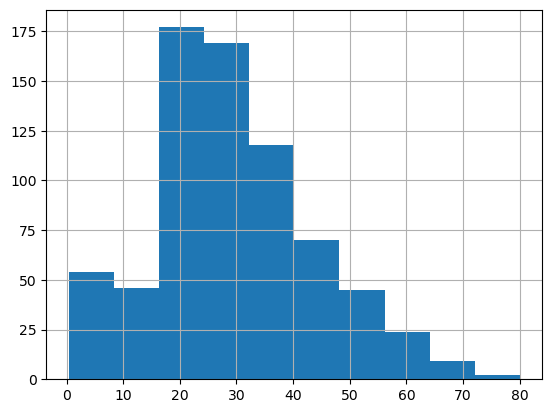

In [4]:
# What is the age distribution of the passengers?
df["Age"].hist()

In [5]:
# How does the survival rate of the passengers differ between males and females?
df.groupby("Sex")[["Survived"]].mean()

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Pclass'>

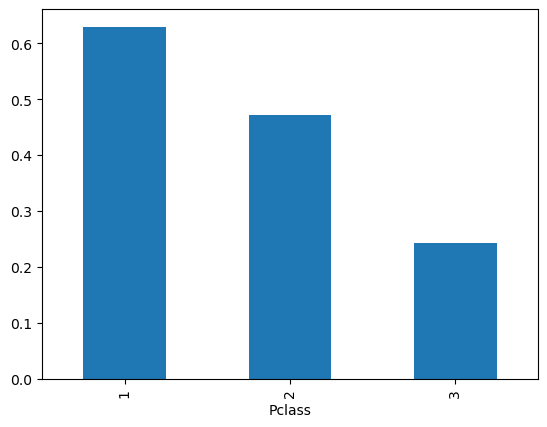

In [6]:
# How does it differ between passenger classes?
df.groupby("Pclass")["Survived"].mean().plot(kind="bar")

# Pandas: data analysis in Python

For data-intensive work in Python, the [Pandas](http://pandas.pydata.org) library has become essential.

_What is Pandas?_

* Pandas can be thought of as *Numpy arrays with labels* for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
* Pandas can also be thought of as `R`'s `data.frame` in Python.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

Its documentation is available at http://pandas.pydata.org/pandas-docs/stable/.


_When do you need Pandas?_

When working with **tabular or structured data** (like R dataframe, SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)

<div class="alert alert-danger">
Pandas is great for working with heterogeneous and tabular 1d/2d data, but not all types of data fit in such structures!
<ul>
<li>When working with array data (e.g. images, numerical algorithms), stick with Numpy.</li>
<li>When working with multidimensional labeled data (e.g. climate data), have a look at <a href="http://xarray.pydata.org/en/stable/">xarray</a>.</li>
</ul>
</div>

# DataFrames

## `Series`

A `Series` is a basic holder for **one-dimensional labeled data**. 

In [7]:
s = pd.Series(["a", "b", "c", "d", "e"])
s

0    a
1    b
2    c
3    d
4    e
dtype: object

In [8]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [9]:
s.values

array(['a', 'b', 'c', 'd', 'e'], dtype=object)

Series also represent the individual columns of a `DataFrame`:

In [10]:
df = pd.read_csv("data/titanic.csv")
age = df["Age"]
age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [11]:
type(age)

pandas.core.series.Series

We can access series values via an index, just like for NumPy arrays:

In [12]:
age[0]

22.0

Unlike the Numpy array, though, this index can be something other than integers:

In [13]:
df2 = df.set_index("Name")
age = df2["Age"]
age

Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
Allen, Mr. William Henry                               35.0
                                                       ... 
Montvila, Rev. Juozas                                  27.0
Graham, Miss. Margaret Edith                           19.0
Johnston, Miss. Catherine Helen "Carrie"                NaN
Behr, Mr. Karl Howell                                  26.0
Dooley, Mr. Patrick                                    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
age["Heikkinen, Miss. Laina"]

26.0

## `DataFrame`

<img src="./figures/nb03/dataframe.svg" width="50%" />

A `DataFrame` is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet or a database table. It combines multiple `Series` objects sharing the same index.

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

# Loading data

A wide range of input/output formats are natively supported by Pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* Parquet
* ...

In [21]:
#pd.read_

In [22]:
#df.to

## Examples

In [23]:
# from CSV files
df = pd.read_csv("data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
# from dict
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


<div class="alert alert-success">
    
**Exercise**. Read the `data/no2.csv` file into a DataFrame `no2`.

Some aspects about the file:
- Which separator is used in the file?
- The second row includes unit information and should be skipped (check `skiprows` keyword).
- For missing values, it uses the `'n/d'` notation (check `na_values` keyword).
- We want to parse the 'timestamp' column as datetimes (check the `parse_dates` keyword).

</div>

In [25]:
no2 = pd.read_csv("data/no2.csv", sep=";", skiprows=[1], na_values=["n/d"], parse_dates=[0])
no2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149039 entries, 0 to 149038
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  149039 non-null  datetime64[ns]
 1   BASCH      139949 non-null  float64       
 2   BONAP      136493 non-null  float64       
 3   PA18       142259 non-null  float64       
 4   VERS       143813 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.7 MB


In [26]:
no2

,timestamp,BASCH,BONAP,PA18,VERS
0,2000-01-01 01:00:00,108.0,NaN,65.0,47.0
1,2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2,2000-01-01 03:00:00,97.0,58.0,73.0,34.0
3,2000-01-01 04:00:00,77.0,52.0,57.0,29.0
4,2000-01-01 05:00:00,79.0,52.0,64.0,28.0
...,...,...,...,...,...
149034,2016-12-31 19:00:00,77.0,49.0,52.0,23.0
149035,2016-12-31 20:00:00,73.0,51.0,49.0,20.0
149036,2016-12-31 21:00:00,61.0,51.0,48.0,16.0
149037,2016-12-31 22:00:00,57.0,49.0,45.0,14.0


# Data manipulation

## Selecting and filtering

One of Pandas' basic features is the labeling of rows and columns, which makes indexing slightly more complex compared to Numpy. We now have to distinguish between:
- selection by **label**
- selection by **position**

In [27]:
df = pd.read_csv("data/titanic.csv")

In [28]:
# Selecting a single column
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [29]:
df[["Age"]]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [30]:
# ... or multiple columns
df[["Age", "Fare"]]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [31]:
# Slicing accesses the rows
df[10:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [32]:
# Filtering rows
df[df.Age > 70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [33]:
df.query("Age > 70 and Sex == 'female'")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [34]:
df.query("Name.str.startswith('Lo')", engine="python")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
782,783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0000,D6,S


When using `[]` like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [35]:
df = df.set_index("Name")
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [36]:
df.loc["Bonnell, Miss. Elizabeth", "Fare"]

26.55

In [37]:
df.loc["Bonnell, Miss. Elizabeth":"Andersson, Mr. Anders Johan"]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Bonnell, Miss. Elizabeth",12,1,1,female,58.0,0,0,113783,26.550,C103,S
"Saundercock, Mr. William Henry",13,0,3,male,20.0,0,0,A/5. 2151,8.050,NaN,S
"Andersson, Mr. Anders Johan",14,0,3,male,39.0,1,5,347082,31.275,NaN,S


In [38]:
df.iloc[0:2, 1:3] # similar to Numpy arrays

,Survived,Pclass
Name,,
"Braund, Mr. Owen Harris",0,3
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1


## Summaries

An essential piece of analysis of large data is efficient summarization: computing aggregations like `sum()`, `mean()`, `median()`, `min()`, and `max()`, in which a single number gives insights into the nature of the data.

In [39]:
df = pd.read_csv("data/titanic.csv")

In [40]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In Pandas, summary functions include:
- `sum()`
- `count()`
- `median()`
- `quantile()`
- `min()`
- `max()`
- `mean()`
- `var()`
- `std()`
- `apply()`


In [41]:
# Aggregate by sum
df["Fare"].sum()

28693.9493

In [42]:
# ... by mean and variance
df["Fare"].mean(), df["Fare"].var()

(32.2042079685746, 2469.436845743117)

In [43]:
# ... by mean, over two columns
df[["Fare", "Age"]].mean()

Fare    32.204208
Age     29.699118
dtype: float64

<div class="alert alert-success">
    
**Exercise.** What is the maximum Fare that was paid? and the median?

</div>

<div class="alert alert-success">
    
**Exercise**. Compute the average survival ratio for all passengers.

</div>

<div class="alert alert-success">
    
**Exercise.** How many passengers older than 70 were on the Titanic?

</div>

## Groups

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a `Series` using one of the many available methods. However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

In [44]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


For example, in the DataFrame above, there is a column `key` which has three possible values: `'A'`, `'B'` and `'C'`. When we want to calculate the sum for each of those groups, we could do the following:

In [45]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


What we did above, applying a function on different groups, is a "groupby operation", and Pandas provides some convenient functionality for this.

Formally, we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="./figures/nb03/split-apply-combine.png" width="50%" />

In [46]:
# groupby and aggregate with sum
df.groupby("key").sum()

,data
key,
A,15
B,30
C,45


In [47]:
# groupby and aggregate with your own function
df.groupby("key").aggregate(lambda x: np.sum(x)+1)

,data
key,
A,16
B,31
C,46


## Aggregate, filter, transform, apply 

In addition to `aggregate()`, the `GroupBy` objects have `filter()`, `transform()` and `apply()` methods that efficiently implement a variety of useful operations before combining the grouped data. 

In [48]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': np.random.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,9
1,B,1,9
2,C,2,3
3,A,3,2
4,B,4,2
5,C,5,0


In [49]:
# Aggregate along multiple functions
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     2    5.5   9
B       1    2.5   4     2    5.5   9
C       2    3.5   5     0    1.5   3

In [50]:
# Aggregate columns with specific functions
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,9
B,1,9
C,2,3


In [51]:
# Filter out data based on its group
def filter_func(g):
    return g['data2'].std() > 3

In [52]:
df

,key,data1,data2
0,A,0,9
1,B,1,9
2,C,2,3
3,A,3,2
4,B,4,2
5,C,5,0


In [53]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,4.949747
B,2.12132,4.949747
C,2.12132,2.121320


In [54]:
df.groupby('key').filter(filter_func)

,key,data1,data2
0,A,0,9
1,B,1,9
3,A,3,2
4,B,4,2


In [55]:
# Transform data based on its group
df.groupby('key').transform(lambda g: g - g.mean())

,data1,data2
0,-1.5,3.5
1,-1.5,3.5
2,-1.5,1.5
3,1.5,-3.5
4,1.5,-3.5
5,1.5,-1.5


In [56]:
## Apply an arbitrary function to the group results
def norm_by_data2(g):
    g['data1'] /= g['data2'].sum()
    return g

df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,9
1,B,0.090909,9
2,C,0.666667,3
3,A,0.272727,2
4,B,0.363636,2
5,C,1.666667,0


## Combining DataFrames

In [57]:
df1 = pd.DataFrame(
    {"a": [1, 2, 3],
     "b": [4, 5, 6]})

df2 = pd.DataFrame(
    {"a": [10, 11],
     "b": [14, 15]})

df3 = pd.DataFrame(
    {"c": [7, 8, 9]})

In [58]:
df1

,a,b
0,1,4
1,2,5
2,3,6


In [59]:
df2

,a,b
0,10,14
1,11,15


In [60]:
df3

,c
0,7
1,8
2,9


In [61]:
# Concat by rows
pd.concat([df1, df2])

,a,b
0,1,4
1,2,5
2,3,6
0,10,14
1,11,15


In [62]:
# Concat by columns
pd.concat([df1, df3], axis=1)

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [63]:
# Merge / joins
df1 = pd.DataFrame(
    {"a": [1, 2, 3],
     "b": [4, 5, 6]})

df2 = pd.DataFrame(
    {"a": [2, 3, 4],
     "c": [7, 8, 9]})

pd.merge(df1, df2, how="left", on="a")

,a,b,c
0,1,4,NaN
1,2,5,7.0
2,3,6,8.0


In [64]:
pd.merge(df1, df2, how="outer", on="a")

,a,b,c
0,1,4.0,NaN
1,2,5.0,7.0
2,3,6.0,8.0
3,4,NaN,9.0


## Plots

Dataframes come equipped with plotting functions wrapped around `matplotlib`.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

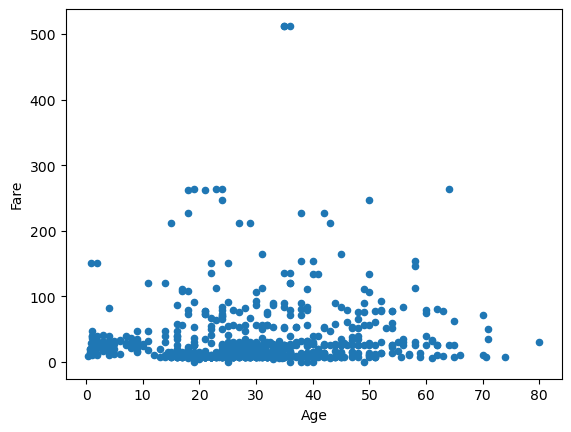

In [65]:
df = pd.read_csv("data/titanic.csv")
df.plot(x="Age", y="Fare", kind="scatter")

<AxesSubplot:ylabel='Frequency'>

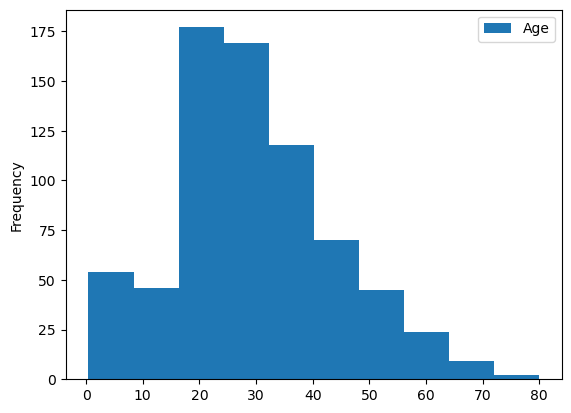

In [66]:
df[["Age"]].plot(kind="hist")

<div class="alert alert-success">
    
**Exercise**. Make a bar plot to visualize the average Fare payed by people depending on their age.

</div>